In [33]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import seaborn as sns

# Load data from output txt files:
# initial_data = np.loadtxt('out1.txt')
# final_data = np.loadtxt('out5.txt')
initial_data = np.loadtxt('det0.txt')
final_data = np.loadtxt('det29.txt')

# Number of events:
nEvents = 10

In [34]:
# Values for inital detector:
xi = []; yi = []; zi = []
pxi = []; pyi = []; pzi = []; ptotali = []
ti = []
for i in range(initial_data.shape[0]):
    xi.append(initial_data[i][0]) # mm
    yi.append(initial_data[i][1])
    zi.append(initial_data[i][2])
    px = initial_data[i][3]; py = initial_data[i][4]; pz = initial_data[i][5]
    pxi.append(px) # MeV/c
    pyi.append(py)
    pzi.append(pz)
    ptotali.append(np.sqrt(px**2+py**2+pz**2))
    t = initial_data[i][6]
    ti.append(t) # ns
    del px, py, pz, t

In [35]:
# Values for final detector:
xf = []; yf = []; zf = []
pxf = []; pyf = []; pzf = []; ptotalf = []
tf = []
for i in range(final_data.shape[0]):
    xf.append(final_data[i][0]) # mm
    yf.append(final_data[i][1])
    zf.append(final_data[i][2])
    px = final_data[i][3]; py = final_data[i][4]; pz = final_data[i][5]
    pxf.append(px) # MeV/c
    pyf.append(py)
    pzf.append(pz)
    ptotalf.append(np.sqrt(px**2+py**2+pz**2))
    t = final_data[i][6]
    tf.append(t) # ns
    del px, py, pz, t

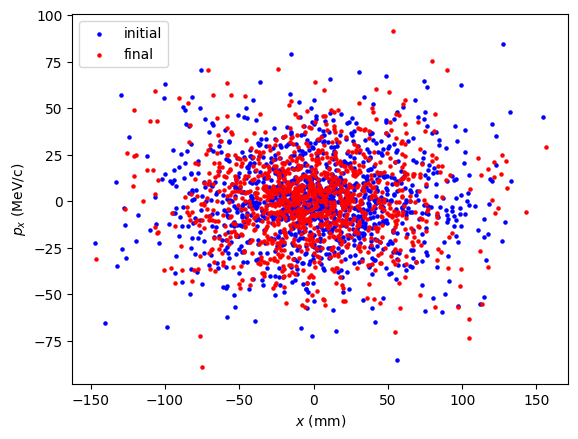

In [36]:
# Plot px vs x:
point_size = 5
plt.scatter(xi,pxi,color='blue',label='initial',s=point_size)
plt.scatter(xf,pxf,color='red',label='final',s=point_size)
plt.xlabel('$x$ (mm)')
plt.ylabel('$p_x$ (MeV/c)')
plt.legend()
plt.show()

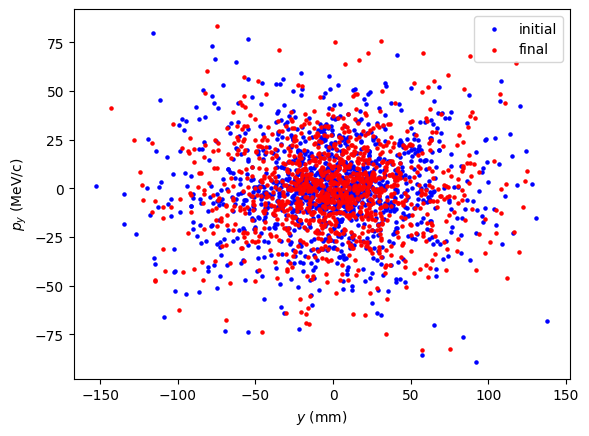

In [37]:
# Plot py vs y:
plt.scatter(yi,pyi,color='blue',label='initial',s=point_size)
plt.scatter(yf,pyf,color='red',label='final',s=point_size)
plt.xlabel('$y$ (mm)')
plt.ylabel('$p_y$ (MeV/c)')
plt.legend()
plt.show()

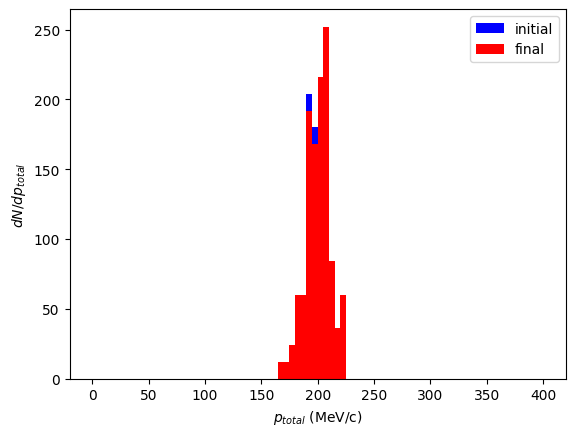

In [38]:
# Plot total p distribution:
plt.hist(ptotali,color='blue',label='initial',range=(0,400),bins=80) # bins of 5
plt.hist(ptotalf,color='red',label='final',range=(0,400),bins=80)
plt.xlabel('$p_{total}$ (MeV/c)')
plt.ylabel('$dN/dp_{total}$')
plt.legend()
plt.show()

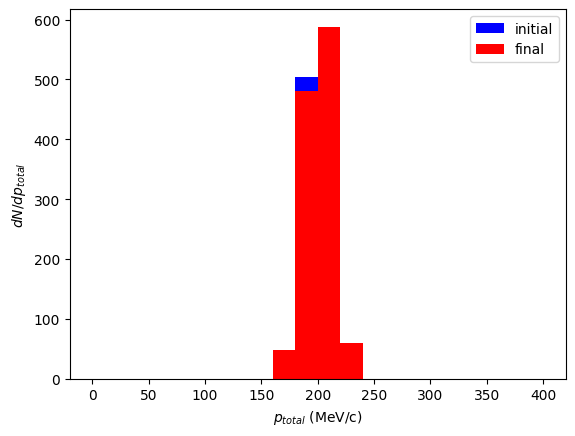

In [39]:
# Plot total p distribution:
plt.hist(ptotali,color='blue',label='initial',range=(0,400),bins=20)
plt.hist(ptotalf,color='red',label='final',range=(0,400),bins=20)
plt.xlabel('$p_{total}$ (MeV/c)')
plt.ylabel('$dN/dp_{total}$')
plt.legend()
plt.show()

In [40]:
# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
t_vals = []
position = []
EventIDs = []
Lz_vals = []
# for j in range(5):
for j in range(30):

    # Load data from output txt files:
    # data = np.loadtxt('out'+str(j+1)+'.txt')
    data = np.loadtxt('det'+str(j)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    t = []
    EventID = []
    Lz = []
    for i in range(data.shape[0]):
        x_val = data[i][0]; y_val = data[i][1]
        x.append(x_val) # mm
        y.append(y_val)
        z.append(data[i][2])
        px_val = data[i][3]; py_val = data[i][4]
        px.append(px_val) # MeV/c
        py.append(py_val)
        pz.append(data[i][5])
        t.append(data[i][6]) # ns
        EventID.append(data[i][8])
        Lz.append(x_val*py_val-y_val*px_val)

    # Values for entire channel:
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px_vals.append(px)
    py_vals.append(py)
    pz_vals.append(pz)
    t_vals.append(t)
    position.append(z[0])
    EventIDs.append(EventID)
    Lz_vals.append(Lz)

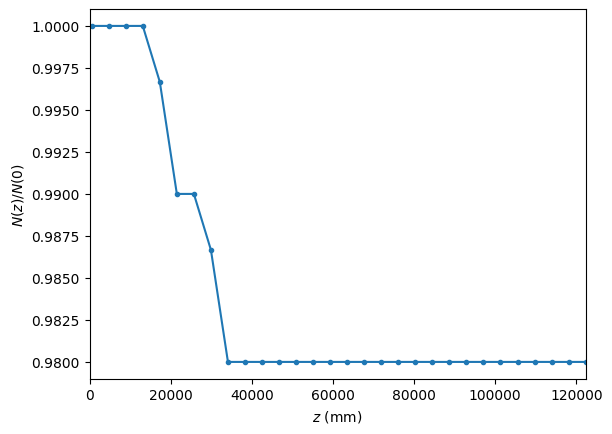

In [41]:
# Plot transmission rate along z:
plt.plot(position,[(len(i)/len(x_vals[0])) for i in x_vals], marker='.')
# plt.ylim(0,1)
plt.xlim(0,max(position))
plt.xlabel('$z$ (mm)')
plt.ylabel('$N(z)/N(0)$')
plt.show()

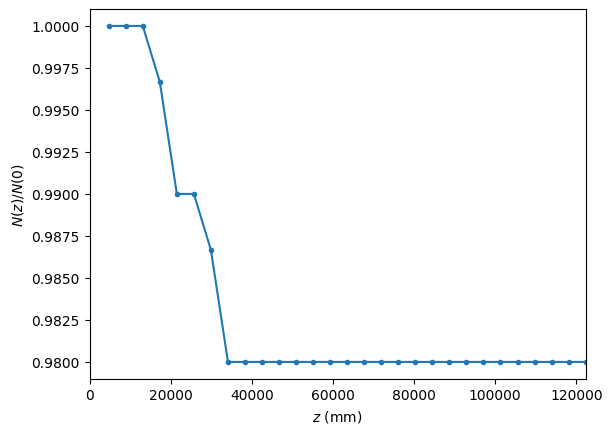

In [42]:
# Plot transmission rate along z:
loss = [(len(i)/len(x_vals[0])) for i in x_vals[1:]]
loss = loss/np.max(loss)
plt.plot(position[1:],loss, marker='.')
plt.xlim(0,max(position))
plt.xlabel('$z$ (mm)')
plt.ylabel('$N(z)/N(0)$')
plt.show()

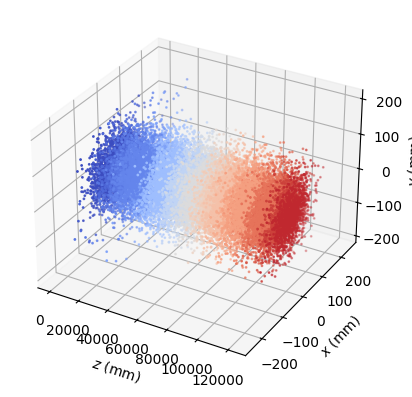

In [43]:
# 3D plot of x, y distribution at each detector:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cmap = plt.get_cmap('coolwarm')
for i in range(len(position)):
    color = cmap(i/len(position))
    ax.scatter(position[i],x_vals[i],y_vals[i],color=color,s=1)
ax.set_xlabel('$z$ (mm)')
ax.set_ylabel('$x$ (mm)')
ax.set_zlabel('$y$ (mm)')
plt.show()

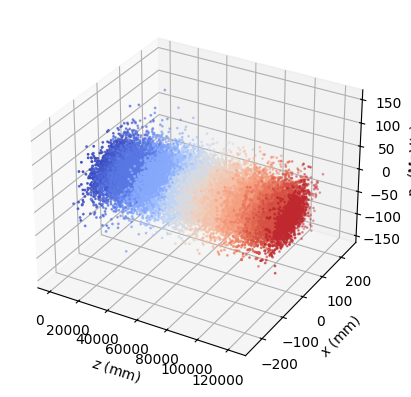

In [44]:
# 3D plot of phase space (x) distribution at each detector:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cmap = plt.get_cmap('coolwarm')
for i in range(len(position)):
    color = cmap(i/len(position))
    ax.scatter(position[i],x_vals[i],px_vals[i],color=color,s=1)
ax.set_xlabel('$z$ (mm)')
ax.set_ylabel('$x$ (mm)')
ax.set_zlabel('$p_x$ (MeV/c)')
plt.show()

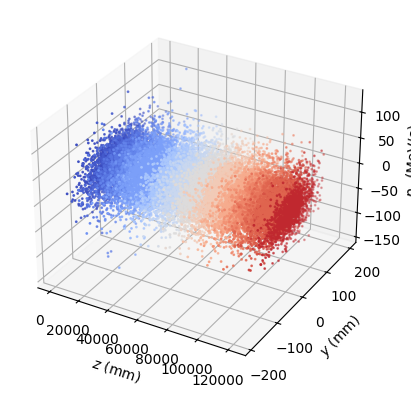

In [45]:
# 3D plot of phase space (y) distribution at each detector:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cmap = plt.get_cmap('coolwarm')
for i in range(len(position)):
    color = cmap(i/len(position))
    ax.scatter(position[i],y_vals[i],py_vals[i],color=color,s=1)
ax.set_xlabel('$z$ (mm)')
ax.set_ylabel('$y$ (mm)')
ax.set_zlabel('$p_y$ (MeV/c)')
plt.show()

In [46]:
# Load data from output txt file:
data = np.loadtxt('det.txt')

# Values from detector:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
Lz_vals = []
t_vals = []
EventIDs = []
xp_vals = []; yp_vals = []
for i in range(data.shape[0]):
    x = data[i][0]; y = data[i][1]; z = data[i][2] # mm
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px = data[i][3]; py = data[i][4]; pz = data[i][5]
    px_vals.append(px) # MeV/c
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
    Lz_vals.append(x*py-y*px)
    t = data[i][6]
    t_vals.append(t) # ns
    EventIDs.append(data[i][8])
    xp, yp = px/pz, py/pz
    xp_vals.append(xp)
    yp_vals.append(yp)
    del px, py, pz, t, xp, yp

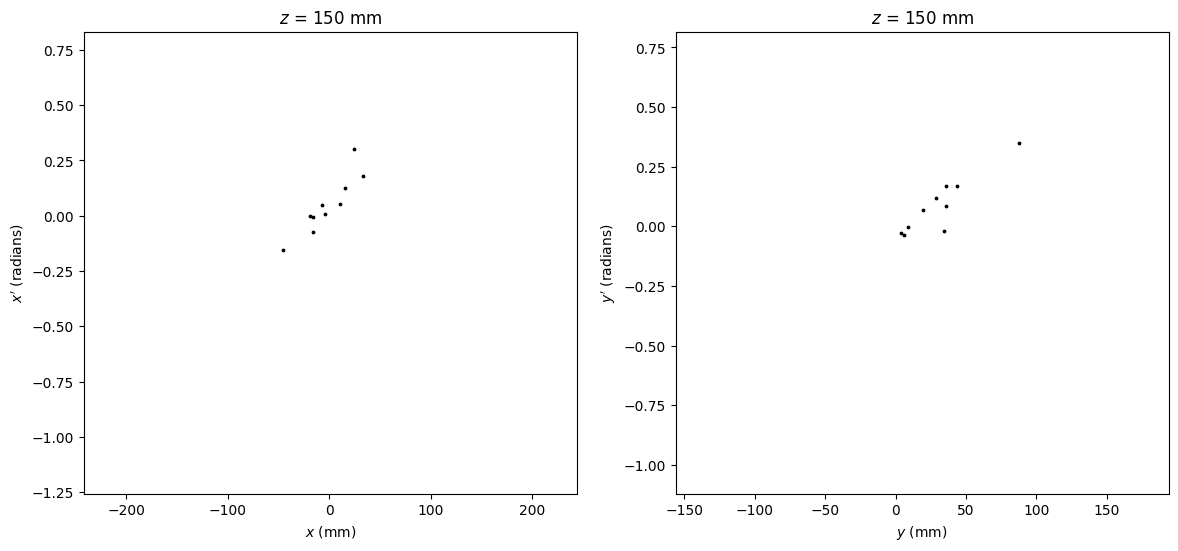

In [47]:
# Animate phase space evolution along z:
unique_z = np.unique(z_vals)
data_by_z1 = []
data_by_z2 = []
for z in unique_z:
    # x:
    temp_x = [x for x, z_val in zip(x_vals, z_vals) if z_val == z]
    temp_xp = [xp for xp, z_val in zip(xp_vals, z_vals) if z_val == z]
    data_by_z1.append((temp_x, temp_xp))
    # y:
    temp_y = [y for y, z_val in zip(y_vals, z_vals) if z_val == z]
    temp_yp = [yp for yp, z_val in zip(yp_vals, z_vals) if z_val == z]
    data_by_z2.append((temp_y, temp_yp))
fig, ax = plt.subplots(1,2,figsize = (14,6))
# x:
sc1 = ax[0].scatter([], [], s=3,color='black')
ax[0].set_xlim(np.min(x_vals), np.max(x_vals))
ax[0].set_xlabel('$x$ (mm)')
ax[0].set_ylabel('$x^{\prime}$ (radians)')
title1 = ax[0].set_title("")
ax[0].set_xlim(min(x_vals), max(x_vals))
ax[0].set_ylim(min(xp_vals), max(xp_vals))
# y:
sc2 = ax[1].scatter([], [], s=3,color='black')
ax[1].set_xlim(np.min(y_vals), np.max(y_vals))
ax[1].set_xlabel('$y$ (mm)')
ax[1].set_ylabel('$y^{\prime}$ (radians)')
title2 = ax[1].set_title("")
ax[1].set_xlim(min(y_vals), max(y_vals))
ax[1].set_ylim(min(yp_vals), max(yp_vals))
def update(frame):
    x, xp = data_by_z1[frame]
    y, yp = data_by_z2[frame]
    sc1.set_offsets(np.column_stack((x, xp)))
    sc2.set_offsets(np.column_stack((y, yp)))
    title1.set_text(f'$z$ = {int(unique_z[frame])} mm')
    title2.set_text(f'$z$ = {int(unique_z[frame])} mm')
ani = FuncAnimation(fig, update, frames=len(unique_z), interval=500, blit=False)
# ani.save('phase_space_subplot_animation.gif', writer='pillow')

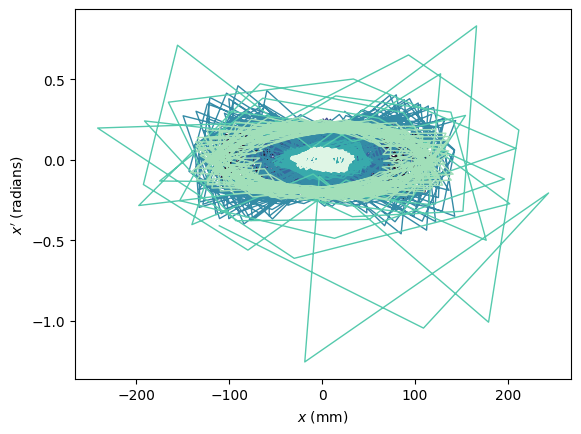

In [61]:
# Subplot phase space (x) trajectory for each event:
# plt.figure(figsize=(12,6))
plt.figure()
cmap = sns.color_palette("mako", as_cmap=True)
colors = cmap(np.linspace(0, 1, nEvents))
for j in range(len(np.unique(EventIDs))):
    xp_select_vals = []
    x_select_vals = []
    for i in range(len(z_vals)):
        if EventIDs[i] == j:
            xp_select_vals.append(xp_vals[i])
            x_select_vals.append(x_vals[i])
    plt.plot(x_select_vals,xp_select_vals,color=colors[j],linewidth=1)
plt.xlabel('$x$ (mm)')
plt.ylabel('$x^{\prime}$ (radians)')
plt.show()

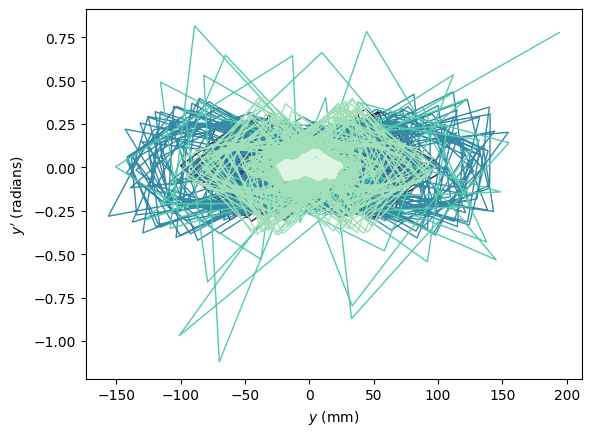

In [60]:
# Subplot phase space (y) trajectory for each event:
# plt.figure(figsize=(12,6))
plt.figure()
cmap = sns.color_palette("mako", as_cmap=True)
colors = cmap(np.linspace(0, 1, nEvents))
for j in range(len(np.unique(EventIDs))):
    yp_select_vals = []
    y_select_vals = []
    for i in range(len(z_vals)):
        if EventIDs[i] == j:
            yp_select_vals.append(yp_vals[i])
            y_select_vals.append(y_vals[i])
    plt.plot(y_select_vals,yp_select_vals,color=colors[j],linewidth=1)
plt.xlabel('$y$ (mm)')
plt.ylabel('$y^{\prime}$ (radians)')
plt.show()